# Modeling

- run with log transform on linear - performs much better
- remove the correlated predictors - used VIF - removed some previously interesting variables
- look at latitude and longitude range - standardized minmax/normalization added for all variables
- look for quadratic forms
- look at residuals - possibly done?
- for mixed model:
    - loglikelihood - likelihood ratio test for goodness of fit
    - analogy of R^2
    - select certain counties - can remove some from analysis
- drought index model - drought and precipitation - cor, regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sn
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from functions import crosscorrelations_target_single_plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("prescribed_treatment_data_climate.csv", index_col=0)

<Axes: xlabel='log_incident_acres_burned', ylabel='Count'>

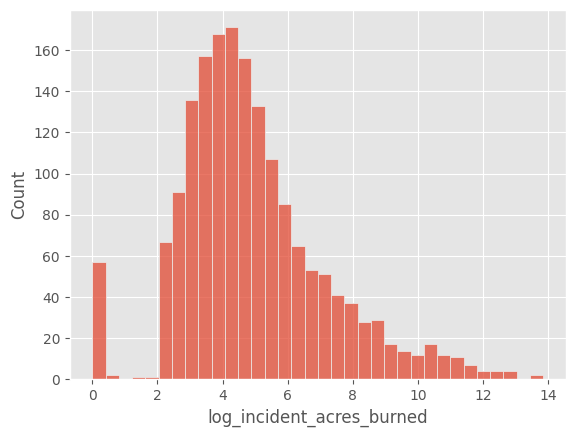

In [3]:
sn.histplot(df["log_incident_acres_burned"])

In [4]:
df["pzi_prescribed_3month_10km"] = [df.at[i,"prescribed_3_months_size_10km"]*df.at[i,'pzi_Value'] for i in range(len(df))]

In [5]:
df["constant"] = [1 for i in range(len(df))]

In [6]:
potential_features = ["log_incident_acres_burned", 'incident_longitude', 'incident_latitude', 'soil moisture', 'temp_avg_Value',
                    'temp_min_Value', 'temp_max_Value', 'precip_new_Value', 'pdsi_Value', 'phdi_Value', 'pmdi_Value',  'pzi_Value', 
                    "prescribed_3_months_size_10km", "prescribed_3_months_size_50km",
                    "prescribed_6_months_size_50km", "prescribed_6_months_size_10km"]

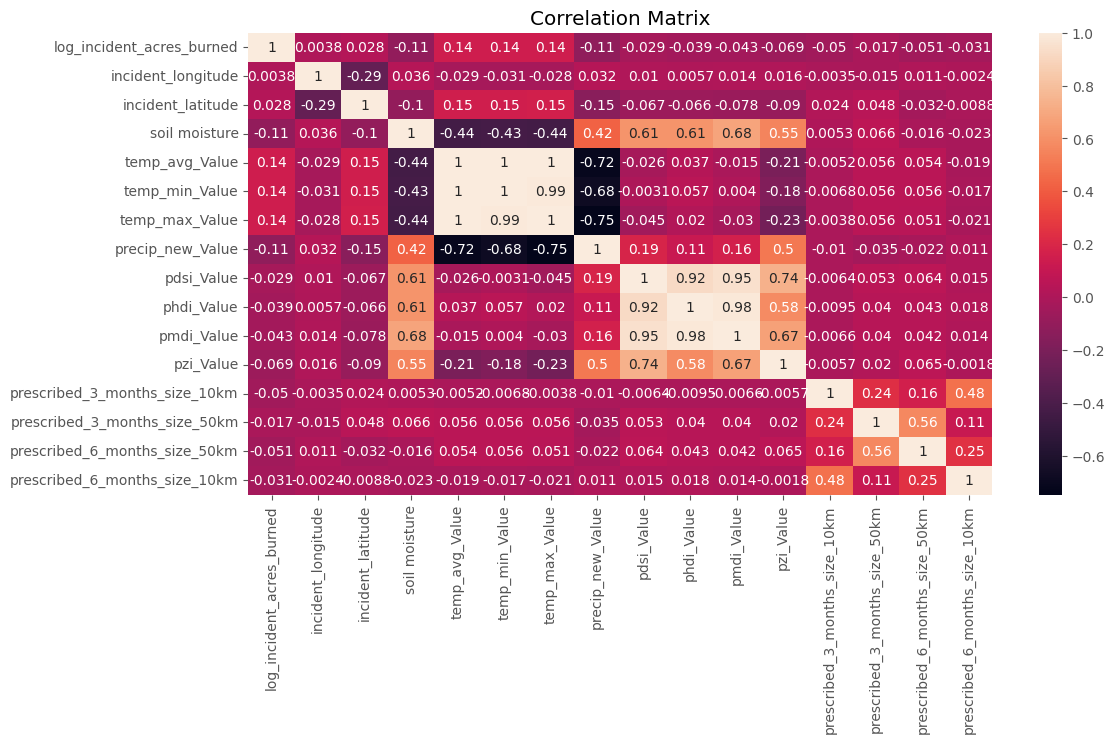

In [7]:
corr_matrix = df[potential_features].corr()
plt.figure(figsize=(12,6))
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [8]:
df["soil_moisture"] = df["soil moisture"]
features = ['incident_longitude', 'incident_latitude', 'soil_moisture', 
            'temp_max_Value', 'precip_new_Value', 'pzi_Value', 'cooling_daysValue',
            "prescribed_3_months_in_10km", "prescribed_3_months_in_25km", "prescribed_3_months_in_50km",
            "prescribed_6_months_in_50km", 
            # "prescribed_3_months_size_10km", "prescribed_3_months_size_25km", "prescribed_3_months_size_50km",
            # "prescribed_6_months_size_50km"
            ]
continuous_features = ['incident_longitude', 'incident_latitude', 'soil_moisture', 
            'temp_max_Value', 'precip_new_Value', 'pzi_Value', 'cooling_daysValue',
            "prescribed_3_months_size_10km", "prescribed_3_months_size_25km", "prescribed_3_months_size_50km",
             "prescribed_6_months_size_50km"]

In [9]:
vif_data = pd.DataFrame()
input_df = df[continuous_features]
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

,feature,VIF
0,incident_longitude,341.861154
1,incident_latitude,228.008997
2,soil_moisture,22.395239
3,temp_max_Value,414.188373
4,precip_new_Value,3.712350
5,pzi_Value,2.148634
6,cooling_daysValue,14.663136
7,prescribed_3_months_size_10km,1.125053
8,prescribed_3_months_size_25km,1.968728
9,prescribed_3_months_size_50km,2.724507


In [10]:
# remove latitude, temp_max, soil moisture, cooling days

In [11]:
features = [#'incident_longitude',
            #'precip_new_Value', 
            'pzi_Value', 
            #'temp_max_Value',
            # "prescribed_3_months_in_10km", "prescribed_3_months_in_25km", "prescribed_3_months_in_50km",
            # "prescribed_6_months_in_50km",
            "prescribed_3_months_size_10km", 
            #"prescribed_3_months_size_25km", "prescribed_3_months_size_50km", 
            #"prescribed_6_months_size_25km" ,
            #"prescribed_6_months_size_10km" ,
            #"prescribed_12_months_size_10km" ,
            # "prescribed_3_months_size_10km", "prescribed_3_months_size_25km", "prescribed_3_months_size_50km",
            # "prescribed_6_months_size_50km"
            ]
continuous_features = [#'incident_longitude',
    
                       #'precip_new_Value', 
                       'pzi_Value', 
                       #"incident_latitude",
                       #'temp_max_Value',
                       "prescribed_3_months_size_10km",
                       #"prescribed_3_months_size_50km", 
                       #"lat_sq"
                       "prescribed_6_months_size_50km",
                       #"prescribed_12_months_size_50km"
                       ]
features = continuous_features

In [12]:
features = ['pzi_Value', "prescribed_3_months_size_10km","prescribed_6_months_size_50km", "pzi_prescribed_3month_10km"]

In [13]:
df["lat_sq"] = df["incident_latitude"]**2

In [14]:
vif_data = pd.DataFrame()
input_df = df[continuous_features]
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

,feature,VIF
0,pzi_Value,1.017184
1,prescribed_3_months_size_10km,1.038627
2,prescribed_6_months_size_50km,1.052192


In [15]:
df[features].describe()

,pzi_Value,prescribed_3_months_size_10km,prescribed_6_months_size_50km,pzi_prescribed_3month_10km
count,1740.00000,1740.000000,1740.000000,1740.000000
mean,-0.68827,15.606788,592.251498,-11.833419
std,1.45524,132.565769,1283.824354,230.444238
min,-4.32000,0.000000,0.000000,-6622.000000
25%,-1.58000,0.000000,5.858184,-0.000000
50%,-0.55000,0.000000,201.300000,-0.000000
75%,-0.17000,0.000000,679.230000,0.000000
max,7.10000,3510.000000,18185.000000,2843.100000


# Linear Regression

## Log target

mode for drought index from temp and precipitation etc. - cross corr. 

In [16]:
y = df["log_incident_acres_burned"]
x = pd.DataFrame(MinMaxScaler().fit_transform(df[features].fillna(0).astype(float)), columns=features)
x["constant"] = [1 for i in range(len(y))]
linear_model = sm.OLS(y, x, missing='drop', hasconst=False).fit()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     log_incident_acres_burned   R-squared (uncentered):                   0.827
Model:                                   OLS   Adj. R-squared (uncentered):              0.827
Method:                        Least Squares   F-statistic:                              1664.
Date:                       Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                               22:55:58   Log-Likelihood:                         -3878.0
No. Observations:                       1740   AIC:                                      7766.
Df Residuals:                           1735   BIC:                                      7793.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pzi_Value                        -1.2110      0.427     -2.835      0.005      -2.049      -0.373
prescribed_3_months_size_10km    -2.3011      1.580     -1.456      0.146      -5.401       0.799
prescribed_6_months_size_50km    -1.2710      0.776     -1.638      0.102      -2.793       0.251
pzi_prescribed_3month_10km        1.2802      2.437      0.525      0.599      -3.500       6.060
constant                          4.4598      1.695      2.631      0.009       1.135       7.785
==============================================================================
Omnibus:                      180.398   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.368
Skew:                           0.760   Prob(JB):                     7.18e-60
Kurtosis:                       4.203   Cond. No.                         71.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
features2 = ['pzi_Value', "prescribed_3_months_size_10km", "pzi_prescribed_3month_10km"]
y = df["log_incident_acres_burned"]
x2 = pd.DataFrame(MinMaxScaler().fit_transform(df[features2].fillna(0).astype(float)), columns=features2)
x2["constant"] = [1 for i in range(len(y))]
linear_model2 = sm.OLS(y, x2, missing='drop', hasconst=False).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     log_incident_acres_burned   R-squared (uncentered):                   0.827
Model:                                   OLS   Adj. R-squared (uncentered):              0.827
Method:                        Least Squares   F-statistic:                              2077.
Date:                       Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                               22:55:58   Log-Likelihood:                         -3879.3
No. Observations:                       1740   AIC:                                      7767.
Df Residuals:                           1736   BIC:                                      7789.
Df Model:                                  4                                                  
Covariance Type:                   nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pzi_Value                        -1.2555      0.427     -2.943      0.003      -2.092      -0.419
prescribed_3_months_size_10km    -2.6975      1.563     -1.726      0.084      -5.762       0.367
pzi_prescribed_3month_10km        1.1899      2.438      0.488      0.626      -3.591       5.971
constant                          4.4973      1.696      2.652      0.008       1.171       7.824
==============================================================================
Omnibus:                      179.940   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.345
Skew:                           0.761   Prob(JB):                     1.97e-59
Kurtosis:                       4.189   Cond. No.                         71.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
linear_model2.params

pzi_Value                       -1.255452
prescribed_3_months_size_10km   -2.697540
pzi_prescribed_3month_10km       1.189914
constant                         4.497298
dtype: float64

In [19]:
features3 = ['pzi_Value', "prescribed_3_months_size_10km"]
y = df["log_incident_acres_burned"]
x3 = pd.DataFrame(MinMaxScaler().fit_transform(df[features3].fillna(0).astype(float)), columns=features3)
x3["constant"] = [1 for i in range(len(y))]
linear_model3 = sm.OLS(y, x3, missing='drop', hasconst=False).fit()
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     log_incident_acres_burned   R-squared (uncentered):                   0.827
Model:                                   OLS   Adj. R-squared (uncentered):              0.827
Method:                        Least Squares   F-statistic:                              2771.
Date:                       Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                               22:55:59   Log-Likelihood:                         -3879.4
No. Observations:                       1740   AIC:                                      7765.
Df Residuals:                           1737   BIC:                                      7781.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pzi_Value                        -1.2317      0.424     -2.907      0.004      -2.063      -0.401
prescribed_3_months_size_10km    -3.0052      1.429     -2.102      0.036      -5.809      -0.202
constant                          5.3221      0.145     36.626      0.000       5.037       5.607
==============================================================================
Omnibus:                      179.824   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.288
Skew:                           0.760   Prob(JB):                     2.03e-59
Kurtosis:                       4.191   Cond. No.                         27.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
linear_model3.params

pzi_Value                       -1.231717
prescribed_3_months_size_10km   -3.005207
constant                         5.322122
dtype: float64

In [22]:
anova_lm(linear_model2, linear_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1736.0,8802.240334,0.0,NaN,NaN,NaN
1,1735.0,8788.649655,1.0,13.590679,2.682986,0.101607


In [23]:
anova_lm(linear_model3, linear_model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1737.0,8803.448456,0.0,NaN,NaN,NaN
1,1736.0,8802.240334,1.0,1.208122,0.238269,0.625521


In [24]:
anova_lm(linear_model3, linear_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1737.0,8803.448456,0.0,NaN,NaN,NaN
1,1735.0,8788.649655,2.0,14.798801,1.460743,0.232349


In [25]:
np.mean(np.power((linear_model.predict(x) - y),2))

5.050948077798014

In [26]:
np.mean(np.power((linear_model2.predict(x2) - y),2))

5.058758812826202

In [27]:
np.mean(np.power((linear_model3.predict(x3) - y),2))

5.059453135878091

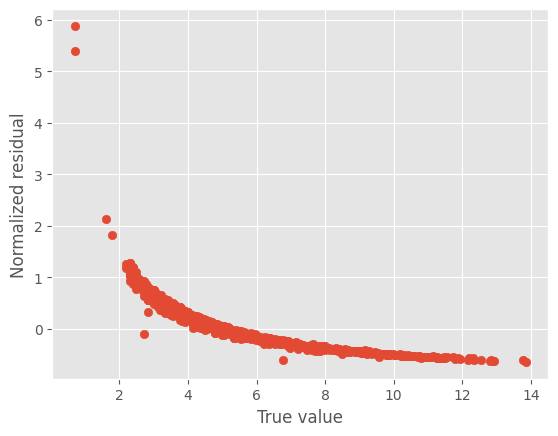

In [28]:
plt.scatter(y, (linear_model2.predict(x2)-y)/y)
plt.xlabel("True value")
plt.ylabel("Normalized residual")
plt.show()

c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\sequo\AppData\Local\Temp\ipykernel_1432\1145615019.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


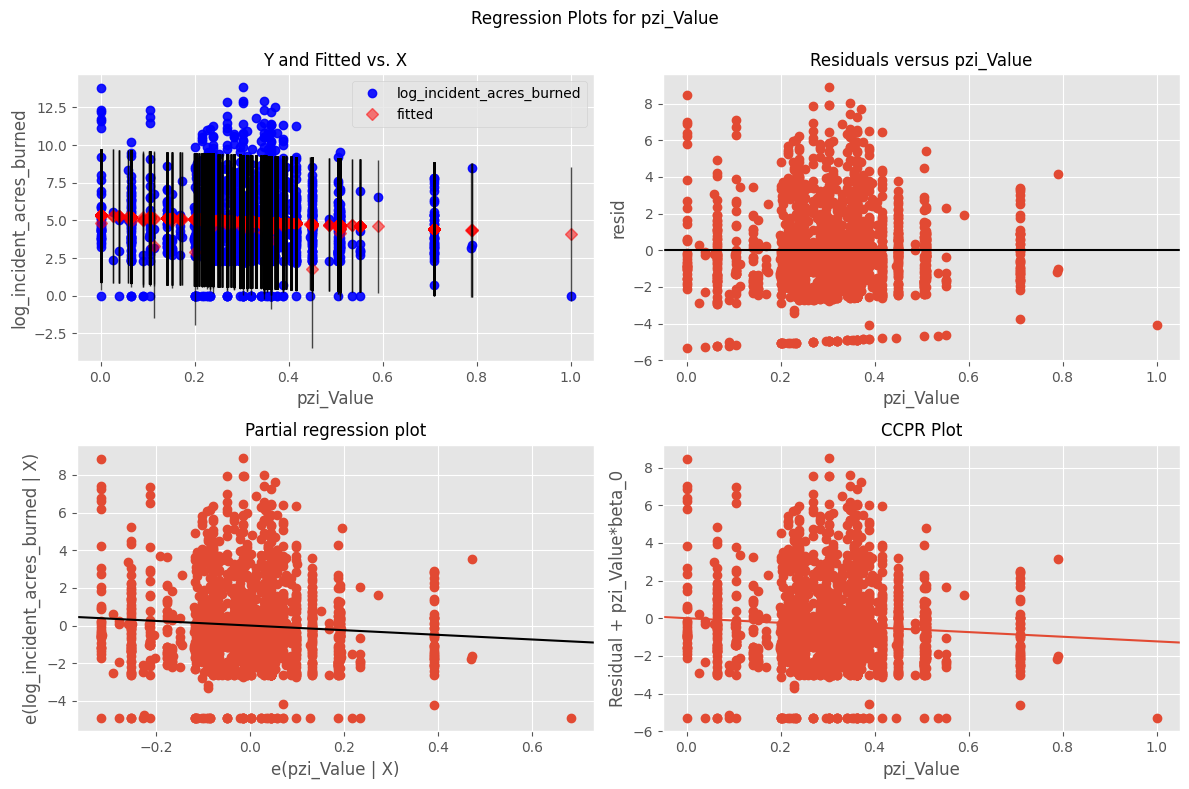

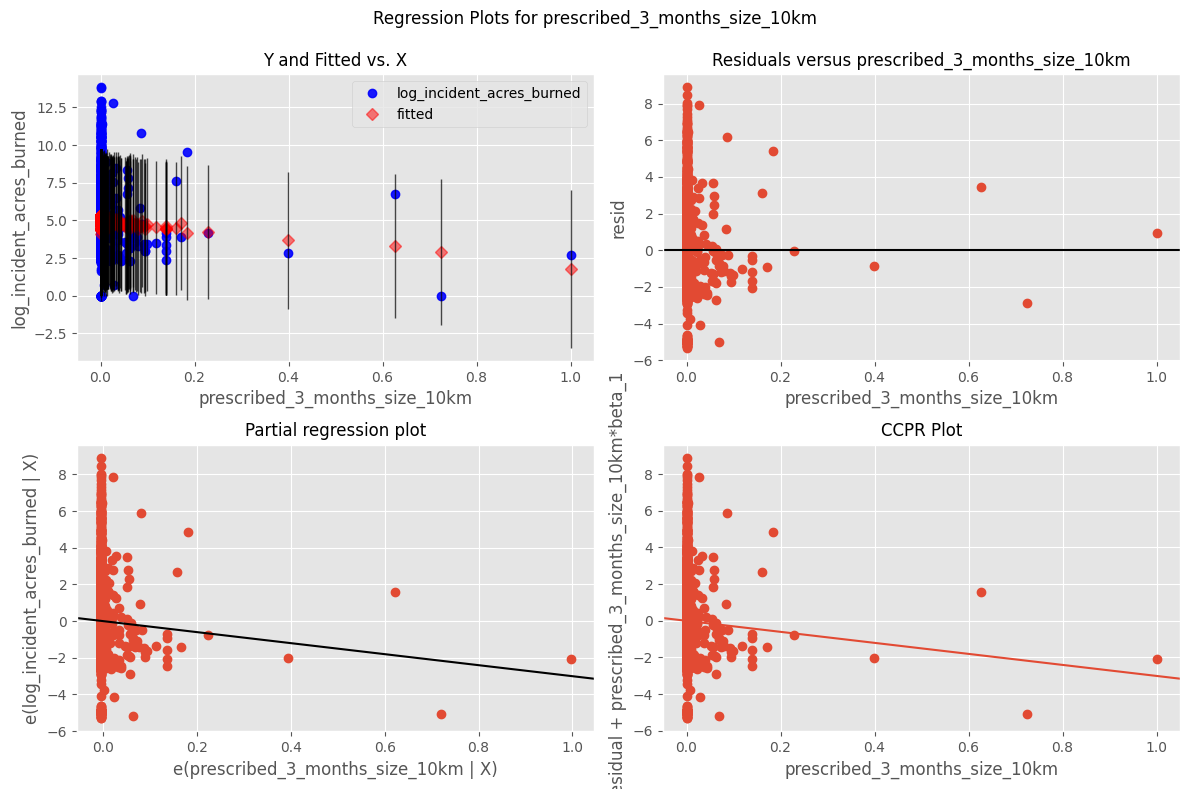

In [29]:
for pred in features3:
    #define figure size
    fig = plt.figure(figsize=(12,8))

    #produce regression plots
    fig = sm.graphics.plot_regress_exog(linear_model3, pred, fig=fig)
    fig.show()

## Monthly dataset

In [30]:
data = pd.read_csv("wildfire_data.csv", index_col=0)
data.index = pd.to_datetime(data.index)
predictors = [ 'RX_acres', 'RX_acres_3_month', 'RX_acres_6_month','RX_acres_9_month', 'RX_acres_12_month', 'soil moisture', 
              'temp_max_Value', 'precip_new_Value','pzi_Value', 'cooling_daysValue']
target = 'incident_acres_burned'
y = data["incident_acres_burned"]
x = data[predictors].fillna(0).astype(float)

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,feature,VIF
0,RX_acres,2.569516
1,RX_acres_3_month,13.994558
2,RX_acres_6_month,46.646568
3,RX_acres_9_month,102.943626
4,RX_acres_12_month,66.036032
5,soil moisture,16.012129
6,temp_max_Value,39.301956
7,precip_new_Value,5.142919
8,pzi_Value,2.988654
9,cooling_daysValue,8.566823


In [32]:
# remove acre 9, 12, 6
new_preds = [ 'RX_acres', 'RX_acres_3_month', 
              'temp_max_Value', 'precip_new_Value','pzi_Value']
new_x = x[new_preds]
vif_data = pd.DataFrame()
vif_data["feature"] = new_x.columns
vif_data["VIF"] = [variance_inflation_factor(new_x.values, i)
                          for i in range(len(new_x.columns))]
vif_data

,feature,VIF
0,RX_acres,1.875056
1,RX_acres_3_month,2.607561
2,temp_max_Value,3.303372
3,precip_new_Value,2.635778
4,pzi_Value,2.136956


# pzi estimate model

In [82]:
pdi_features = ["temp_max_Value", "precip_new_Value"]
                #"soil moisture"]
pdi_y = data["pzi_Value"].reset_index(drop=True)
pdi_scalar = StandardScaler().fit(x[pdi_features].fillna(0).astype(float))
pdi_x = x[pdi_features].reset_index(drop=True)
#pdi_x = pd.DataFrame(pdi_scalar.transform(x[pdi_features].fillna(0).astype(float)), columns=pdi_features)
pdi_x["intercept"] = 1
linear_model = sm.OLS(pdi_y, pdi_x, missing='drop').fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pzi_Value   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.38e-24
Time:                        21:23:14   Log-Likelihood:                -131.01
No. Observations:                  84   AIC:                             268.0
Df Residuals:                      81   BIC:                             275.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
temp_max_Value       0.0973      0.013      7.280      0.000       0.071       0.124
precip_new_Value     1.2261      0.085     14.374      0.000       1.056       1.396
intercept           -9.8125      1.090     -9.004      0.000     -11.981      -7.644
==============================================================================
Omnibus:                        9.608   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               14.787
Skew:                           0.431   Prob(JB):                     0.000615
Kurtosis:                       4.866   Cond. No.                         631.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
pdi_scalar.mean_

array([72.56309524,  1.74107143])

In [88]:
new_x = np.array([72.563095, 1.74107143]).reshape(1,-1)

In [89]:
new_x = pdi_scalar.transform(new_x)
new_x = pd.DataFrame(new_x, columns=pdi_features)
new_x["intercept"] = 1
linear_model.get_prediction(new_x).summary_frame(alpha=0.05)

c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-9.812546,1.08983,-11.980965,-7.644127,-12.997204,-6.627889


In [86]:
linear_model.mse_resid

1.3741362908234238

c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\sequo\AppData\Local\Temp\ipykernel_1432\1624931176.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


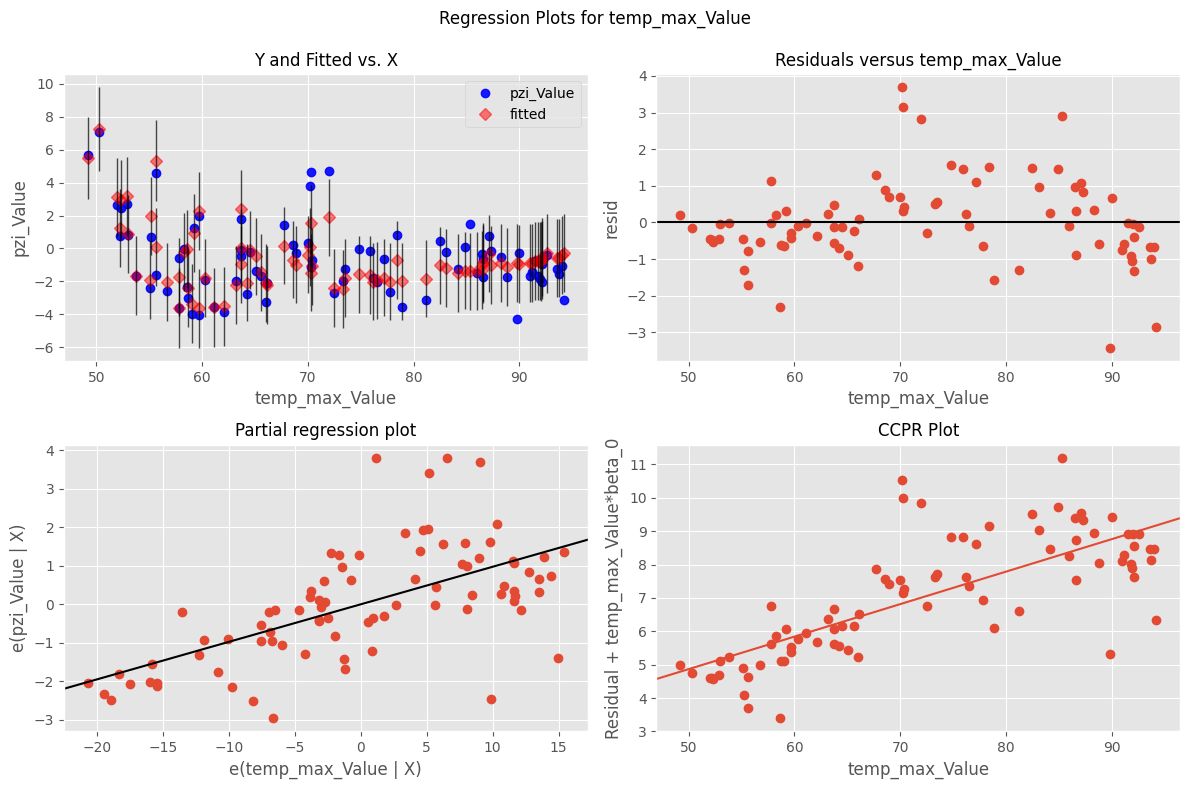

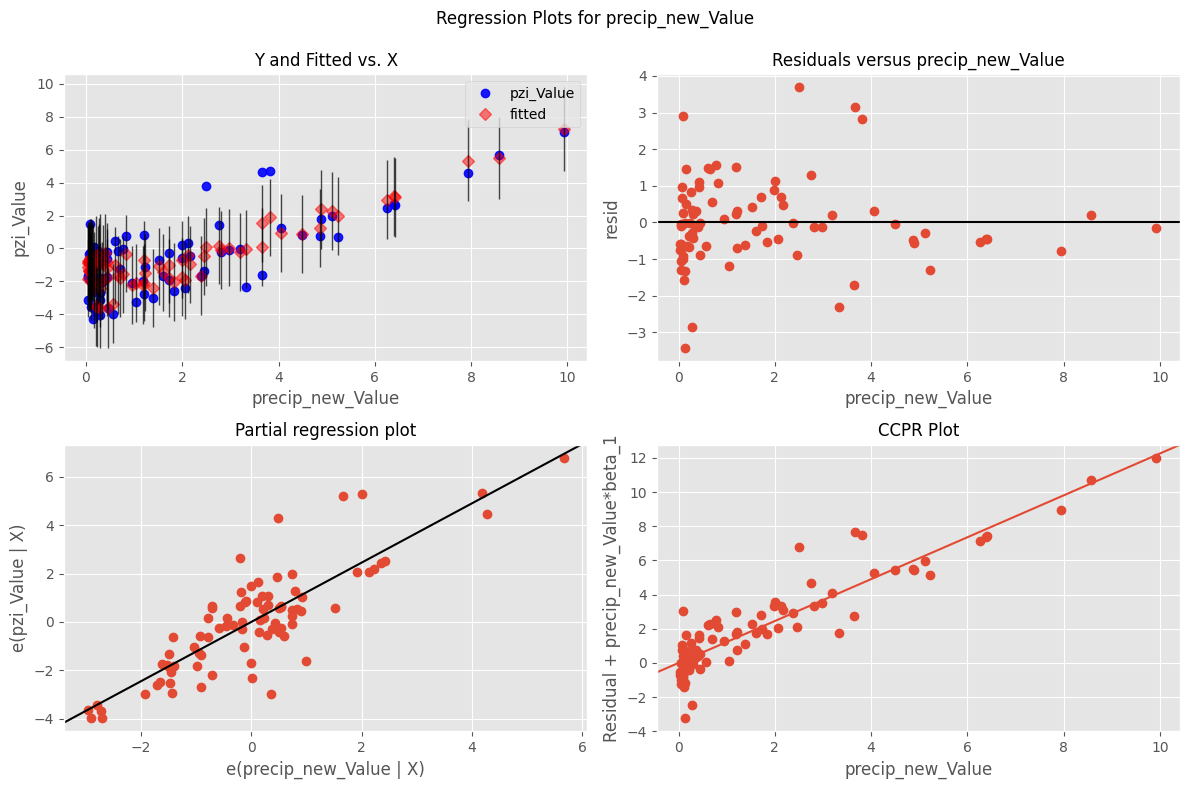

In [87]:
for pred in pdi_features:
    #define figure size
    fig = plt.figure(figsize=(12,8))

    #produce regression plots
    fig = sm.graphics.plot_regress_exog(linear_model, pred, fig=fig)
    fig.show()


# Mixed Effects Model

In [ ]:
features_string = " + ".join(features3)

In [ ]:
df = df.dropna(subset=["incident_county"]).reset_index(drop=True)

In [ ]:
df["county_new"] = ["multiple" if len(str(county).split(","))>1 else county for county in df["incident_county"]]

In [ ]:
county_regions = {
    "North Coast": ['Del Norte', 'Humboldt', 'Mendocino', "Sonoma", "Lake", "Napa", "Marin", "Trinity"],
    "Shasta Cascades": ['Siskiyou', "Trinity", "Shasta", "Lassen", "Modoc",
                        'Tehama', "Butte", "Plumas", "State of Oregon"],
    "Central Valley": ["Glenn", "Colusa", "Sutter","Yolo", "Sacramento", "Solano", "Fresno", "Kern", "Kings",
                       "Madera", "Merced", "Placer", "San Joaquin", "Tehama", "Yuba", "Stanislaus"],
    "Sierras": ["Alpine", "Amador", "Calaveras", "El Dorado", "Inyo", "Mariposa", "Mono", "Nevada", "Plumas", "Sierra", "Tulare",
                "Tuolumne", "State of Nevada"],
    "Central Coast": ["Contra Costa", "Alameda", "San Fransisco", "San Mateo", "Santa Clara",
                      "Santa Cruz", "San Benito", "Monterey", "San Luis Obispo", "Santa Barbara", "Ventura"],
    "South Coast": ["Los Angeles", "Orange", "San Diego"],
    "Desert": ["Riverside", "San Bernardino", "Imperial", "Mexico"],
    "Multiple": ["multiple"]
}

In [ ]:
regions_per_county = {v: k for k, val in county_regions.items() for v in val}

In [ ]:
df["county_new"] = [regions_per_county[county] for county in df["county_new"].to_list()]

In [ ]:
df["county_new"].value_counts().values

array([382, 304, 282, 230, 212, 156, 131,  37], dtype=int64)

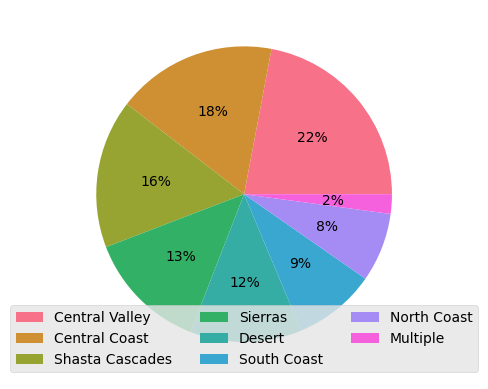

In [ ]:
colors = sn.color_palette('husl', n_colors=int(len(df["county_new"].value_counts().values)))
plt.pie(df["county_new"].value_counts().values, colors=colors, autopct='%.0f%%')
plt.legend(df["county_new"].value_counts().keys(), loc="lower center", ncol=3)
plt.show()

In [ ]:
df["county_cat"] = pd.factorize(df["county_new"])[0]

In [ ]:
import statsmodels.formula.api as smf

md = smf.mixedlm("log_incident_acres_burned ~ {}".format(features_string), pd.concat([df[features3].astype(float),df[["county_cat", "log_incident_acres_burned"]]], axis=1).fillna(0), groups=df["county_cat"])
md = sm.MixedLM(df["log_incident_acres_burned"], x3.loc[df["log_incident_acres_burned"].index], groups=df["county_cat"])
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_incident_acres_burned
No. Observations:  1734    Method:             REML                     
No. Groups:        8       Scale:              4.4732                   
Min. group size:   37      Log-Likelihood:     -3775.3862               
Max. group size:   382     Converged:          Yes                      
Mean group size:   216.8                                                
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
pzi_Value                     -0.887    0.404 -2.195 0.028 -1.679 -0.095
prescribed_3_months_size_10km -1.194    1.351 -0.884 0.377 -3.842  1.454
constant                       5.655    0.627  9.017 0.000  4.426  6.885
Group Var                      2.989    0.784                        

In [ ]:
np.mean(np.power((mdf.predict(x3.loc[df["log_incident_acres_burned"].index])-df["log_incident_acres_burned"].fillna(0)).values,2))

5.230545792953724

# Co-regionalization